In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [108]:
df=pd.read_csv('CAR DETAILS.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [109]:
# 1. Check data types
print(df.dtypes)

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [110]:
# 2. Check null values
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [111]:
#3.Check and handle duplicated values

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

763
0


In [112]:
#feature engineering 
df['brand']=df['name'].str.split(expand=True)[0]
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [113]:
#4. Check data consistency
print(df.describe(percentiles=[0.75,0.95,0.98,0.99]).T)

print(df[df['km_driven'] > 220000].shape)
print(df[df['selling_price'] > 1200000].shape)

print(df['fuel'].unique())
print(df[df['fuel'] == 'Electric'].shape)
print(df[df['fuel'] == 'LPG'].shape)

print(df['seller_type'].unique())
print(df['transmission'].unique())

print(df['owner'].unique())
print(df[df['owner'] == 'Test Drive Car'].shape)
print(df['name'].nunique())




                count           mean            std      min       50%  \
year           3577.0    2012.962538       4.251759   1992.0    2013.0   
selling_price  3577.0  473912.542074  509301.809816  20000.0  350000.0   
km_driven      3577.0   69250.545709   47579.940016      1.0   60000.0   

                    75%        95%        98%        99%        max  
year             2016.0     2019.0     2019.0     2020.0     2020.0  
selling_price  600000.0  1200000.0  1800000.0  2675000.0  8900000.0  
km_driven       90000.0   149534.8   193440.0   223158.4   806599.0  
(41, 9)
(170, 9)
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
(1, 9)
(22, 9)
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
(17, 9)
1491


In [114]:
#Outlier treatment for numerical columns

df['km_driven']=np.where(df['km_driven'] > 220000,220000,df['km_driven'])

df['selling_price']=np.where(df['selling_price'] > 1200000,1200000,df['selling_price'])

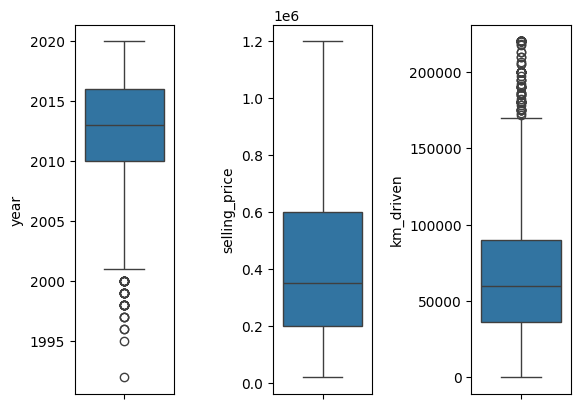

In [115]:
#plot box plot of numerical columns
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=0.5)
for i,c in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[c])
plt.show()

In [116]:
#Drop name column
df.drop('name',axis=1,inplace=True)

In [117]:
#Apply onehotencoding to categorical columns

df1=pd.get_dummies(data=df,drop_first=False)


pd.set_option('display.max_columns', None)

print(df1.head(100))
print(df1.shape)

     year  selling_price  km_driven  fuel_CNG  fuel_Diesel  fuel_Electric  \
0    2007          60000      70000     False        False          False   
1    2007         135000      50000     False        False          False   
2    2012         600000     100000     False         True          False   
3    2017         250000      46000     False        False          False   
4    2014         450000     141000     False         True          False   
..    ...            ...        ...       ...          ...            ...   
108  2017         399000      30000     False        False          False   
109  2018         750000      87000     False         True          False   
110  2019         750000      15000     False        False          False   
111  2017         315000      16000     False        False          False   
112  2012         600000      60000     False         True          False   

     fuel_LPG  fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0

In [118]:
#Split into X and y
X=df1.drop('selling_price',axis=1)
y=df1['selling_price']

print(X)
print(y)

      year  km_driven  fuel_CNG  fuel_Diesel  fuel_Electric  fuel_LPG  \
0     2007      70000     False        False          False     False   
1     2007      50000     False        False          False     False   
2     2012     100000     False         True          False     False   
3     2017      46000     False        False          False     False   
4     2014     141000     False         True          False     False   
...    ...        ...       ...          ...            ...       ...   
4335  2014      80000     False         True          False     False   
4336  2014      80000     False         True          False     False   
4337  2009      83000     False        False          False     False   
4338  2016      90000     False         True          False     False   
4339  2016      40000     False        False          False     False   

      fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0            True               False                    T

In [119]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=81)

In [120]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def eval_model(mname,model,linear_model):

    print(mname)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    y_pred_train=model.predict(X_train)

    mae_test=mean_absolute_error(y_test,y_pred)
    mae_train=mean_absolute_error(y_train,y_pred_train)

    rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
    rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

    print('MAE test',mae_test)
    print('MAE train',mae_train)

    print('RMSE train',rmse_train)
    print('RMSE test',rmse_test)
    
    if linear_model:
        r2_1=r2_score(y_train,y_pred_train)
        r2=r2_score(y_test,y_pred)

        print('Train R2 score',r2_1)
        print('Test R2 score',r2)
    
    ret={'Model':[mname],'MAE test':[mae_test],'MAE train':[mae_train],'RMSE test':[rmse_test],'RMSE train':[rmse_train]}
    ret=pd.DataFrame(ret)
    ret.set_index('Model',inplace=True)
    return ret

        

In [121]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
c1=eval_model('Linear Regression',lr,True)


Linear Regression
MAE test 123349.74902432338
MAE train 124839.91585219766
RMSE train 164546.49760970852
RMSE test 163947.71280282215
Train R2 score 0.6944070150180712
Test R2 score 0.7288332022733202


In [122]:
#Bagging Linear Regression
from sklearn.ensemble import BaggingRegressor

bag_lr=BaggingRegressor(LinearRegression(),n_estimators=100,random_state=1,max_samples=1.0)

c2=eval_model('Bagging Linear Regressor',bag_lr,False)

Bagging Linear Regressor


MAE test 123298.34206121496
MAE train 124968.28534049432
RMSE train 164614.79225124806
RMSE test 163938.10563593745


In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

kn=KNeighborsRegressor(15)

n_neighbors=[2,3,5,10,15,20]

kn_rs = GridSearchCV(estimator = kn,param_grid={'n_neighbors':n_neighbors},return_train_score=True)
c3=eval_model('K Neighbors Regression',kn_rs,False)



K Neighbors Regression
MAE test 180707.21396648043
MAE train 164337.76856576954
RMSE train 224927.29241810326
RMSE test 247613.91800295498


In [124]:
'''
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

bag_kn=GridSearchCV(BaggingRegressor(kn_rs),param_grid={'n_estimators':[50,100]},verbose=10)
c3=eval_model('K Neighbors Regression',bag_kn,False)

MAE test 176588.46500698326
MAE train 100460.44983047887
RMSE train 140175.48873751226
RMSE test 253308.1001012536

'''

"\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.model_selection import GridSearchCV\n\nbag_kn=GridSearchCV(BaggingRegressor(kn_rs),param_grid={'n_estimators':[50,100]},verbose=10)\nc3=eval_model('K Neighbors Regression',bag_kn,False)\n\nMAE test 176588.46500698326\nMAE train 100460.44983047887\nRMSE train 140175.48873751226\nRMSE test 253308.1001012536\n\n"

In [125]:
#Bagging KNN Regression
from sklearn.ensemble import BaggingRegressor

bag_kn=GridSearchCV(estimator=BaggingRegressor(KNeighborsRegressor()),param_grid={'estimator__n_neighbors':[5,10],'n_estimators':[10,50,100]})
c4=eval_model('Bagging KNN Regressor',bag_kn,False)

Bagging KNN Regressor
MAE test 178167.81834357543
MAE train 156216.3792338343
RMSE train 214753.12138647566
RMSE test 246260.2039943856


In [126]:
# decision tree regression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


max_depth=[5,10,15,20,25]
min_samples_split=[2,3,5,10]


dt=DecisionTreeRegressor(criterion='squared_error')

dt_rs=GridSearchCV(estimator=dt,param_grid={'max_depth':max_depth,'min_samples_split':min_samples_split},return_train_score=True)

c5=eval_model('Decision Tree Regression',dt_rs,False)



Decision Tree Regression
MAE test 117587.86089177697
MAE train 92597.53627327534
RMSE train 130423.2001301316
RMSE test 169007.59548503108


In [127]:
'''
#Bagging Decision Tree Regression
from sklearn.ensemble import BaggingRegressor

#bag_dt=BaggingRegressor(dt_rs,n_estimators=100,random_state=1)

#Note here each of the 100 estimators will be tuned on the max_depth and min_samples_split parameter.In the other case 
#Note here the results are as follows
#MAE test 109134.90547511564
#MAE train 56513.76955790527
#RMSE train 81049.67136490348
#RMSE test 154390.2447662355

tt=GridSearchCV(estimator=dt,param_grid={'max_depth':[5,10,15,20],'min_samples_split':[2,4,6,8]})
tt.fit(X_train,y_train)
bag_dt=GridSearchCV(BaggingRegressor(tt),param_grid={'n_estimators':[100],'max_samples':[1.0]},verbose=10)

c6=eval_model('Bagging Decision Tree Regressor',bag_dt,False)
'''


"\n#Bagging Decision Tree Regression\nfrom sklearn.ensemble import BaggingRegressor\n\n#bag_dt=BaggingRegressor(dt_rs,n_estimators=100,random_state=1)\n\n#Note here each of the 100 estimators will be tuned on the max_depth and min_samples_split parameter.In the other case \n#Note here the results are as follows\n#MAE test 109134.90547511564\n#MAE train 56513.76955790527\n#RMSE train 81049.67136490348\n#RMSE test 154390.2447662355\n\ntt=GridSearchCV(estimator=dt,param_grid={'max_depth':[5,10,15,20],'min_samples_split':[2,4,6,8]})\ntt.fit(X_train,y_train)\nbag_dt=GridSearchCV(BaggingRegressor(tt),param_grid={'n_estimators':[100],'max_samples':[1.0]},verbose=10)\n\nc6=eval_model('Bagging Decision Tree Regressor',bag_dt,False)\n"

In [128]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

param_grid = {
    'estimator__max_depth' : [5, 10, 15, 20, 25],
    'estimator__min_samples_split' : [2, 3, 5],
      #  'max_samples' : [ 0.1, 0.2, 0.5,1.0],
      #  'estimator__min_samples_leaf':[2,4,6]
}

clf = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(),
                                     n_estimators = 100, max_features = 1.0),
                   param_grid)
c6=eval_model('Bagging Decision Tree Regressor',clf,False)


Bagging Decision Tree Regressor
MAE test 108250.92255216009
MAE train 86446.67449373529
RMSE train 118929.25065137658
RMSE test 152547.98346444577


In [129]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

rg=Ridge()
alpha=np.logspace(-3,3,num=14)

rg_rs = GridSearchCV(estimator = rg,param_grid={'alpha':alpha},return_train_score=True)

c7=eval_model('Ridge Regression',rg_rs,True)




Ridge Regression
MAE test 123373.10447347697
MAE train 125039.69103565978
RMSE train 164673.4830903372
RMSE test 163991.68175564538
Train R2 score 0.6939351624236025
Test R2 score 0.7286877349321796


In [130]:
#Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs =GridSearchCV(estimator = ls,param_grid={'alpha':alpha},return_train_score=True)
c8=eval_model('Lasso Regression',rg_rs,True)

Lasso Regression
MAE test 123373.10447347697
MAE train 125039.69103565978
RMSE train 164673.4830903372
RMSE test 163991.68175564538
Train R2 score 0.6939351624236025
Test R2 score 0.7286877349321796


In [131]:
#Random Forest Regression


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,return_train_score=True)

c9=eval_model('Random Forest Regression',rf_rs,False)





Random Forest Regression
MAE test 132546.73903458612
MAE train 125318.0847519768
RMSE train 164423.49033698556
RMSE test 175825.55112591924


In [132]:
#Adaboost Regression
from sklearn.ensemble import AdaBoostRegressor

param_grid={'n_estimators':[50,100,200],
            'learning_rate':[0.001,0.01,0.1],
 }

ab=AdaBoostRegressor()
ab_rs=GridSearchCV(ab,param_grid=param_grid)
c10=eval_model('Adaboost Regression',ab_rs,False)


Adaboost Regression
MAE test 155036.47812328456
MAE train 145830.3083321699
RMSE train 183989.40903112205
RMSE test 194069.07257375232


In [133]:
#Gradient Boost Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[50,100,200],
            'learning_rate':[0.001,0.01,0.1],
             'max_depth':[1,2,4],
              'subsample':[0.5,0.75,1] }

gr=GradientBoostingRegressor()


gr_rs= GridSearchCV(gr,param_grid=param_grid,return_train_score=True)
c11=eval_model('Gradient Boosting Regression',gr_rs,False)


Gradient Boosting Regression


In [ ]:
#XGBoost Regression
import xgboost as xgb

xg=xgb.XGBRegressor()
param_grid={'n_estimators':[50,100,200],
            'learning_rate':[0.001,0.01,0.1]}

xg_rs=GridSearchCV(xg,param_grid)
c12=eval_model('XGBoost Regression',xg_rs,False)






XGBoost Regression
MAE test 106803.46258510824
MAE train 86368.80470934551
RMSE train 121488.74462941237
RMSE test 150029.3847589643


In [ ]:
#Compare all models

res=pd.concat([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12])
res


,MAE test,MAE train,RMSE test,RMSE train
Model,,,,
Linear Regression,127931.029243,124839.915852,167692.731184,164546.497610
Bagging Linear Regressor,127865.558038,124968.285340,167659.609288,164614.792251
K Neighbors Regression,180707.213966,164337.768566,247613.918003,224927.292418
Bagging KNN Regressor,177479.438969,155850.037317,245710.034760,214387.723663
Decision Tree Regression,117443.204783,92597.536273,168951.151194,130423.200130
Bagging Decision Tree Regressor,108012.407573,86397.884669,152026.026472,118970.222425
Ridge Regression,127963.292092,125039.691036,167746.957685,164673.483090
Lasso Regression,127963.292092,125039.691036,167746.957685,164673.483090
Random Forest Regression,130506.243079,121518.199855,173406.709806,159276.344838


In [ ]:
#Using pickle library to save model file
#Best performing model is Random Forest

import pickle
#this is the best model
with open('car_details_model.pkl','wb') as f:
    pickle.dump(xg_rs,f)
#save all 12 models
with open('lr.pkl','wb') as f:
    pickle.dump(lr,f)
with open('bag_lr.pkl','wb') as f:
    pickle.dump(bag_lr,f)
with open('kn_rs.pkl','wb') as f:
    pickle.dump(kn_rs,f)
with open('bag_kn.pkl','wb') as f:
    pickle.dump(bag_kn,f)
with open('dt_rs.pkl','wb') as f:
    pickle.dump(dt_rs,f)
with open('clf.pkl','wb') as f:
    pickle.dump(clf,f)
with open('rg_rs.pkl','wb') as f:
    pickle.dump(rg_rs,f)
with open('ls_rs.pkl','wb') as f:
    pickle.dump(ls_rs,f)
with open('rf_rs.pkl','wb') as f:
    pickle.dump(rf_rs,f)
with open('ab_rs.pkl','wb') as f:
    pickle.dump(ab_rs,f)
with open('gr_rs.pkl','wb') as f:
    pickle.dump(gr_rs,f)
with open('xg_rs.pkl','wb') as f:
    pickle.dump(xg_rs,f)




In [ ]:
df2=df1.sample(n=20,random_state=1)
df2.to_csv('sample.csv',index=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


with open('car_details_model.pkl','rb') as f:
    model=pickle.load(f)

df3=pd.read_csv('sample.csv')


X_sample=df3.drop('selling_price',axis=1)
y_sample=df3['selling_price']


y_pred=model.predict(X_sample)

mae_test=mean_absolute_error(y_sample,y_pred)

rmse_test=np.sqrt(mean_squared_error(y_sample,y_pred))

print('MAE test',mae_test)
print('RMSE test',rmse_test)




MAE test 86630.616015625
RMSE test 119002.44760259462
